In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import solve_ivp

plt.rcParams['agg.path.chunksize'] = 10000

%matplotlib inline

In [2]:
def forced_pendulum(t,x,drag,natfreq,forcingamplitude,forcingfreq):
    
    angle, vel = x
    
    dotangle = vel
    
    dotvel = -drag*vel - natfreq*natfreq*np.sin(angle) + natfreq*natfreq*forcingamplitude*np.sin(forcingfreq*t)
    
    return np.array([dotangle,dotvel])


def jac_forced_pendulum(t,x,drag,natfreq,forcingamplitude,forcingfreq):
    
    angle, vel = x
    
    return np.array([[0, 1],[-natfreq*natfreq*np.cos(angle),-drag]])


In [50]:
drag = 0
natfreq = 2*np.pi
forcingfreq = 2*np.pi
forcingamplitude = 1

init_angle = 0
init_vel = 0

tend = 5
npoints = 500

sol = solve_ivp(lambda t,x: forced_pendulum(t,x,drag,natfreq,forcingamplitude,forcingfreq),
                t_span = [0,tend],
                y0 = np.array([init_angle,init_vel]),
                jac = lambda t,x: jac_forced_pendulum(t,x,drag,natfreq,forcingamplitude,forcingfreq),
                t_eval = np.linspace(0,tend,npoints))

/home/squinterodlr/.local/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  warn("The following arguments have no effect for a chosen solver: {}."


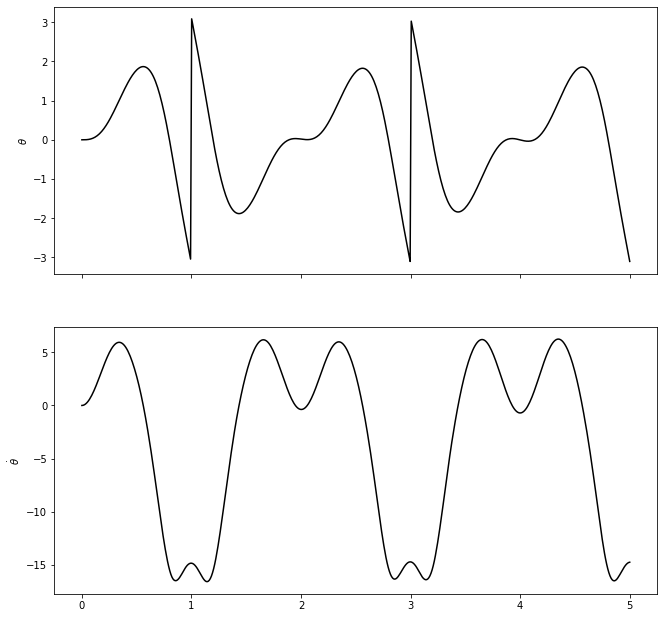

In [51]:
fig, axs = plt.subplots(2,sharex=True)
fig.set_size_inches(10.80,10.80)

axs[0].plot(sol.t,(sol.y[0]+np.pi)%(2*np.pi) - np.pi,'k')
axs[0].set_ylabel(r'$\theta$')

axs[1].plot(sol.t,sol.y[1],'k')
axs[1].set_ylabel(r'$\dot{\theta}$')

plt.show()

In [5]:
drag = 0.15
natfreq = 2*np.pi
forcingfreq = 0.5*np.pi
forcingamplitude = 0.5

tend = 20
npoints = int(np.ceil(60*tend*2.5))

ninitpoints = 2500

centerpos = 0
centervel = 0

radius = 0.5*np.pi

Rs = np.linspace(1e-6,radius*radius,int(np.floor(np.sqrt(ninitpoints))))
Thetas = np.linspace(0,2*np.pi,int(np.floor(np.sqrt(ninitpoints))))

#initpoints = [np.array([centerpos + r*r*np.cos(theta),centervel + r*r*np.sin(theta)])\
#              for r in np.sqrt(Rs) for theta in Thetas]

initpoints = 2*np.pi*np.random.random_sample([ninitpoints,2]) - np.pi


solutions = [ solve_ivp(lambda t,x: forced_pendulum(t,x,drag,natfreq,forcingamplitude,forcingfreq),
                t_span = [0,tend],
                y0 = np.array([init_angle,init_vel]),
                jac = lambda t,x: jac_forced_pendulum(t,x,drag,natfreq,forcingamplitude,forcingfreq),
                t_eval = np.linspace(0,tend,npoints))\
             for init_angle, init_vel in initpoints ]

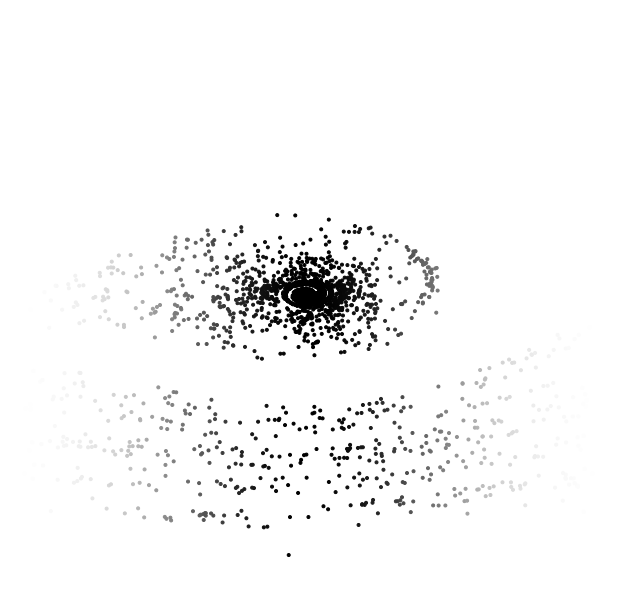

In [9]:
solutions_y = np.array([sol.y for sol in solutions ])
solutions_y[:,0,:] = (solutions_y[:,0,:] + np.pi)%(2*np.pi) - np.pi
maxpos = np.abs(solutions_y[:,0,:]).max()
maxvel = np.abs(solutions_y[:,1,:]).max()


fig = plt.figure(figsize=(10.8,10.80))
fig.patch.set_alpha(1)
fig.tight_layout()
ax = plt.gca()
#ax.set_aspect('equal')

for frame, time in enumerate(solutions[0].t):
    
    ax.cla()
    ax.set_xlim(-maxpos,maxpos)
    ax.set_ylim(-maxvel,maxvel)
    #ax.set_aspect('equal')
    ax.axis('off')
    ax.scatter(solutions_y[:,0,frame],solutions_y[:,1,frame],c=np.cos(0.5*solutions_y[:,0,frame])**2,
               cmap='Greys',marker='.')
    fig.savefig('animation/forced-pendulum-%04d.png'%frame,dpi=100)
    
    print('Frame',frame+1,'of',npoints,end='\r')
plt.show()

In [137]:
initpoints = solutions_y[:,:,-1]

solutions = [ solve_ivp(lambda t,x: forced_pendulum(t,x,drag,natfreq,forcingamplitude,forcingfreq),
                t_span = [0,tend],
                y0 = np.array([init_angle,init_vel]),
                jac = lambda t,x: jac_forced_pendulum(t,x,drag,natfreq,forcingamplitude,forcingfreq),
                t_eval = np.linspace(0,tend,npoints))\
             for init_angle, init_vel in initpoints ]

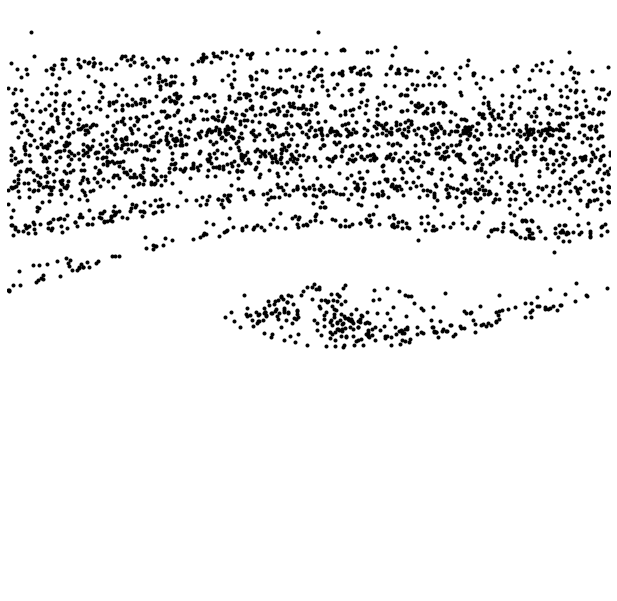

In [138]:
fig = plt.figure(figsize=(10.8,10.80))
fig.patch.set_alpha(1)
fig.tight_layout()
ax = plt.gca()
#ax.set_aspect('equal')

for frame, time in enumerate(solutions[0].t):
    
    ax.cla()
    ax.set_xlim(-maxpos,maxpos)
    ax.set_ylim(-maxvel,maxvel)
    #ax.set_aspect('equal')
    ax.axis('off')
    ax.scatter(solutions_y[:,0,frame],solutions_y[:,1,frame],color='k',marker='.')
    fig.savefig('animation/forced-pendulum-%04d.png'%(frame+1500),dpi=100)
    
    print('Frame',frame+1,'of',npoints,end='\r')
plt.show()